In [6]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx


In [7]:
file_path = "../mushroom_network_no_edges.pkl"

with open(file_path, 'rb') as f:
    data = pd.read_pickle(f)

In [8]:
# Print number of nodes
print(f"Number of nodes: {data.number_of_nodes()}")

# Print number of edges
print(f"Number of edges: {data.number_of_edges()}")

# Print node attributes
print("Node attributes:")
count = 0
for node, attrs in data.nodes(data=True):
    print(f"Node {node}: {attrs}")
    count += 1
    if count >= 5:
        break

Number of nodes: 1101
Number of edges: 0
Node attributes:
Node 1: {'mushroom': 'Russula maculata', 'id': 1, 'views_all_time': 9897, 'article': 'https://en.wikipedia.org/wiki/Russula_maculata', 'sporePrintColor': ['yellow', 'ochre'], 'howEdible': [], 'stipeCharacter': ['bare'], 'capShape': ['convex', 'depressed'], 'hymeniumType': ['adnexed', 'free'], 'ecologicalType': ['mycorrhizal'], 'whichGills': ['Gills on hymenium'], 'conservation_status': [], 'image': 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/82/1996-02-15_Russula_maculata_Qu%C3%A9l._%26_Roze_117.jpg/250px-1996-02-15_Russula_maculata_Qu%C3%A9l._%26_Roze_117.jpg', 'Genus': 'Russula', 'Family': 'Russulaceae', 'Order': 'Russulales', 'Class': 'Agaricomycetes', 'Division': 'Basidiomycota', 'Species': 'R.\xa0maculata', 'text': 'Russula maculata is a species of mushroom in the genus Russula . [ 1 ] Its cap ranges from 4–10 centimetres ( 1 + 1 ⁄ 2 –4\xa0in) wide, with hues varying from whitish to red. [ 2 ] It is difficult to

In [9]:
# Get all nodes into a dataframe with their attributes
df = pd.DataFrame.from_dict(dict(data.nodes(data=True)), orient='index')

In [10]:
df.head()

,mushroom,id,views_all_time,article,sporePrintColor,howEdible,stipeCharacter,capShape,hymeniumType,ecologicalType,whichGills,conservation_status,image,Genus,Family,Order,Class,Division,Species,text
1,Russula maculata,1,9897,https://en.wikipedia.org/wiki/Russula_maculata,"[yellow, ochre]",[],[bare],"[convex, depressed]","[adnexed, free]",[mycorrhizal],[Gills on hymenium],[],https://upload.wikimedia.org/wikipedia/commons...,Russula,Russulaceae,Russulales,Agaricomycetes,Basidiomycota,R. maculata,Russula maculata is a species of mushroom in t...
2,Russula vinosa,2,14637,https://en.wikipedia.org/wiki/Russula_vinosa,[],[edible],[bare],"[convex, depressed]","[free, adnexed]",[mycorrhizal],[Gills on hymenium],[],https://upload.wikimedia.org/wikipedia/commons...,Russula,Russulaceae,Russulales,Agaricomycetes,Basidiomycota,R. vinosa,"Russula vinosa , commonly known as the darkeni..."
3,Gymnopilus pseudofulgens,3,1157,https://en.wikipedia.org/wiki/Gymnopilus_pseud...,[],[],[],[convex],"[adnexed, adnate]",[saprotrophic],[Gills on hymenium],[],https://upload.wikimedia.org/wikipedia/commons...,Gymnopilus,Hymenogastraceae,Agaricales,Agaricomycetes,Basidiomycota,G. pseudofulgens,Gymnopilus pseudofulgens is a species of mushr...
4,Gymnopilus josserandii,4,2525,https://en.wikipedia.org/wiki/Gymnopilus_josse...,[ochre],[],[bare],[convex],"[adnexed, adnate]",[saprotrophic],[Gills on hymenium],[],https://upload.wikimedia.org/wikipedia/commons...,Gymnopilus,Hymenogastraceae,Agaricales,Agaricomycetes,Basidiomycota,G. josserandii,Gymnopilus josserandii is a species of mushroo...
5,Albatrellus subrubescens,5,35128,https://en.wikipedia.org/wiki/Albatrellus_subr...,[white],[poisonous],[bare],"[convex, flat]",[decurrent],[mycorrhizal],[],[],https://upload.wikimedia.org/wikipedia/commons...,Albatrellus,Albatrellaceae,Russulales,Agaricomycetes,Basidiomycota,A. subrubescens,Albatrellus subrubescens is a species of polyp...


In [11]:
morphological_attributes = ['sporePrintColor', 'howEdible', 'stipeCharacter', 'capShape', 'hymeniumType', 'ecologicalType', 'whichGills', 'conservation_status']

In [12]:
df[morphological_attributes].head()

,sporePrintColor,howEdible,stipeCharacter,capShape,hymeniumType,ecologicalType,whichGills,conservation_status
1,"[yellow, ochre]",[],[bare],"[convex, depressed]","[adnexed, free]",[mycorrhizal],[Gills on hymenium],[]
2,[],[edible],[bare],"[convex, depressed]","[free, adnexed]",[mycorrhizal],[Gills on hymenium],[]
3,[],[],[],[convex],"[adnexed, adnate]",[saprotrophic],[Gills on hymenium],[]
4,[ochre],[],[bare],[convex],"[adnexed, adnate]",[saprotrophic],[Gills on hymenium],[]
5,[white],[poisonous],[bare],"[convex, flat]",[decurrent],[mycorrhizal],[],[]


In [13]:
# Print number of unique values for each morphological attribute using df, keep in mind all attribute values are lists
for attr in morphological_attributes:
    unique_values = df[attr].explode().nunique()
    print(f"Number of unique values for {attr}: {unique_values}")

Number of unique values for sporePrintColor: 17
Number of unique values for howEdible: 9
Number of unique values for stipeCharacter: 4
Number of unique values for capShape: 15
Number of unique values for hymeniumType: 14
Number of unique values for ecologicalType: 8
Number of unique values for whichGills: 1
Number of unique values for conservation_status: 5


## MORPHOLOGY PRELIMINARY ANALYSIS

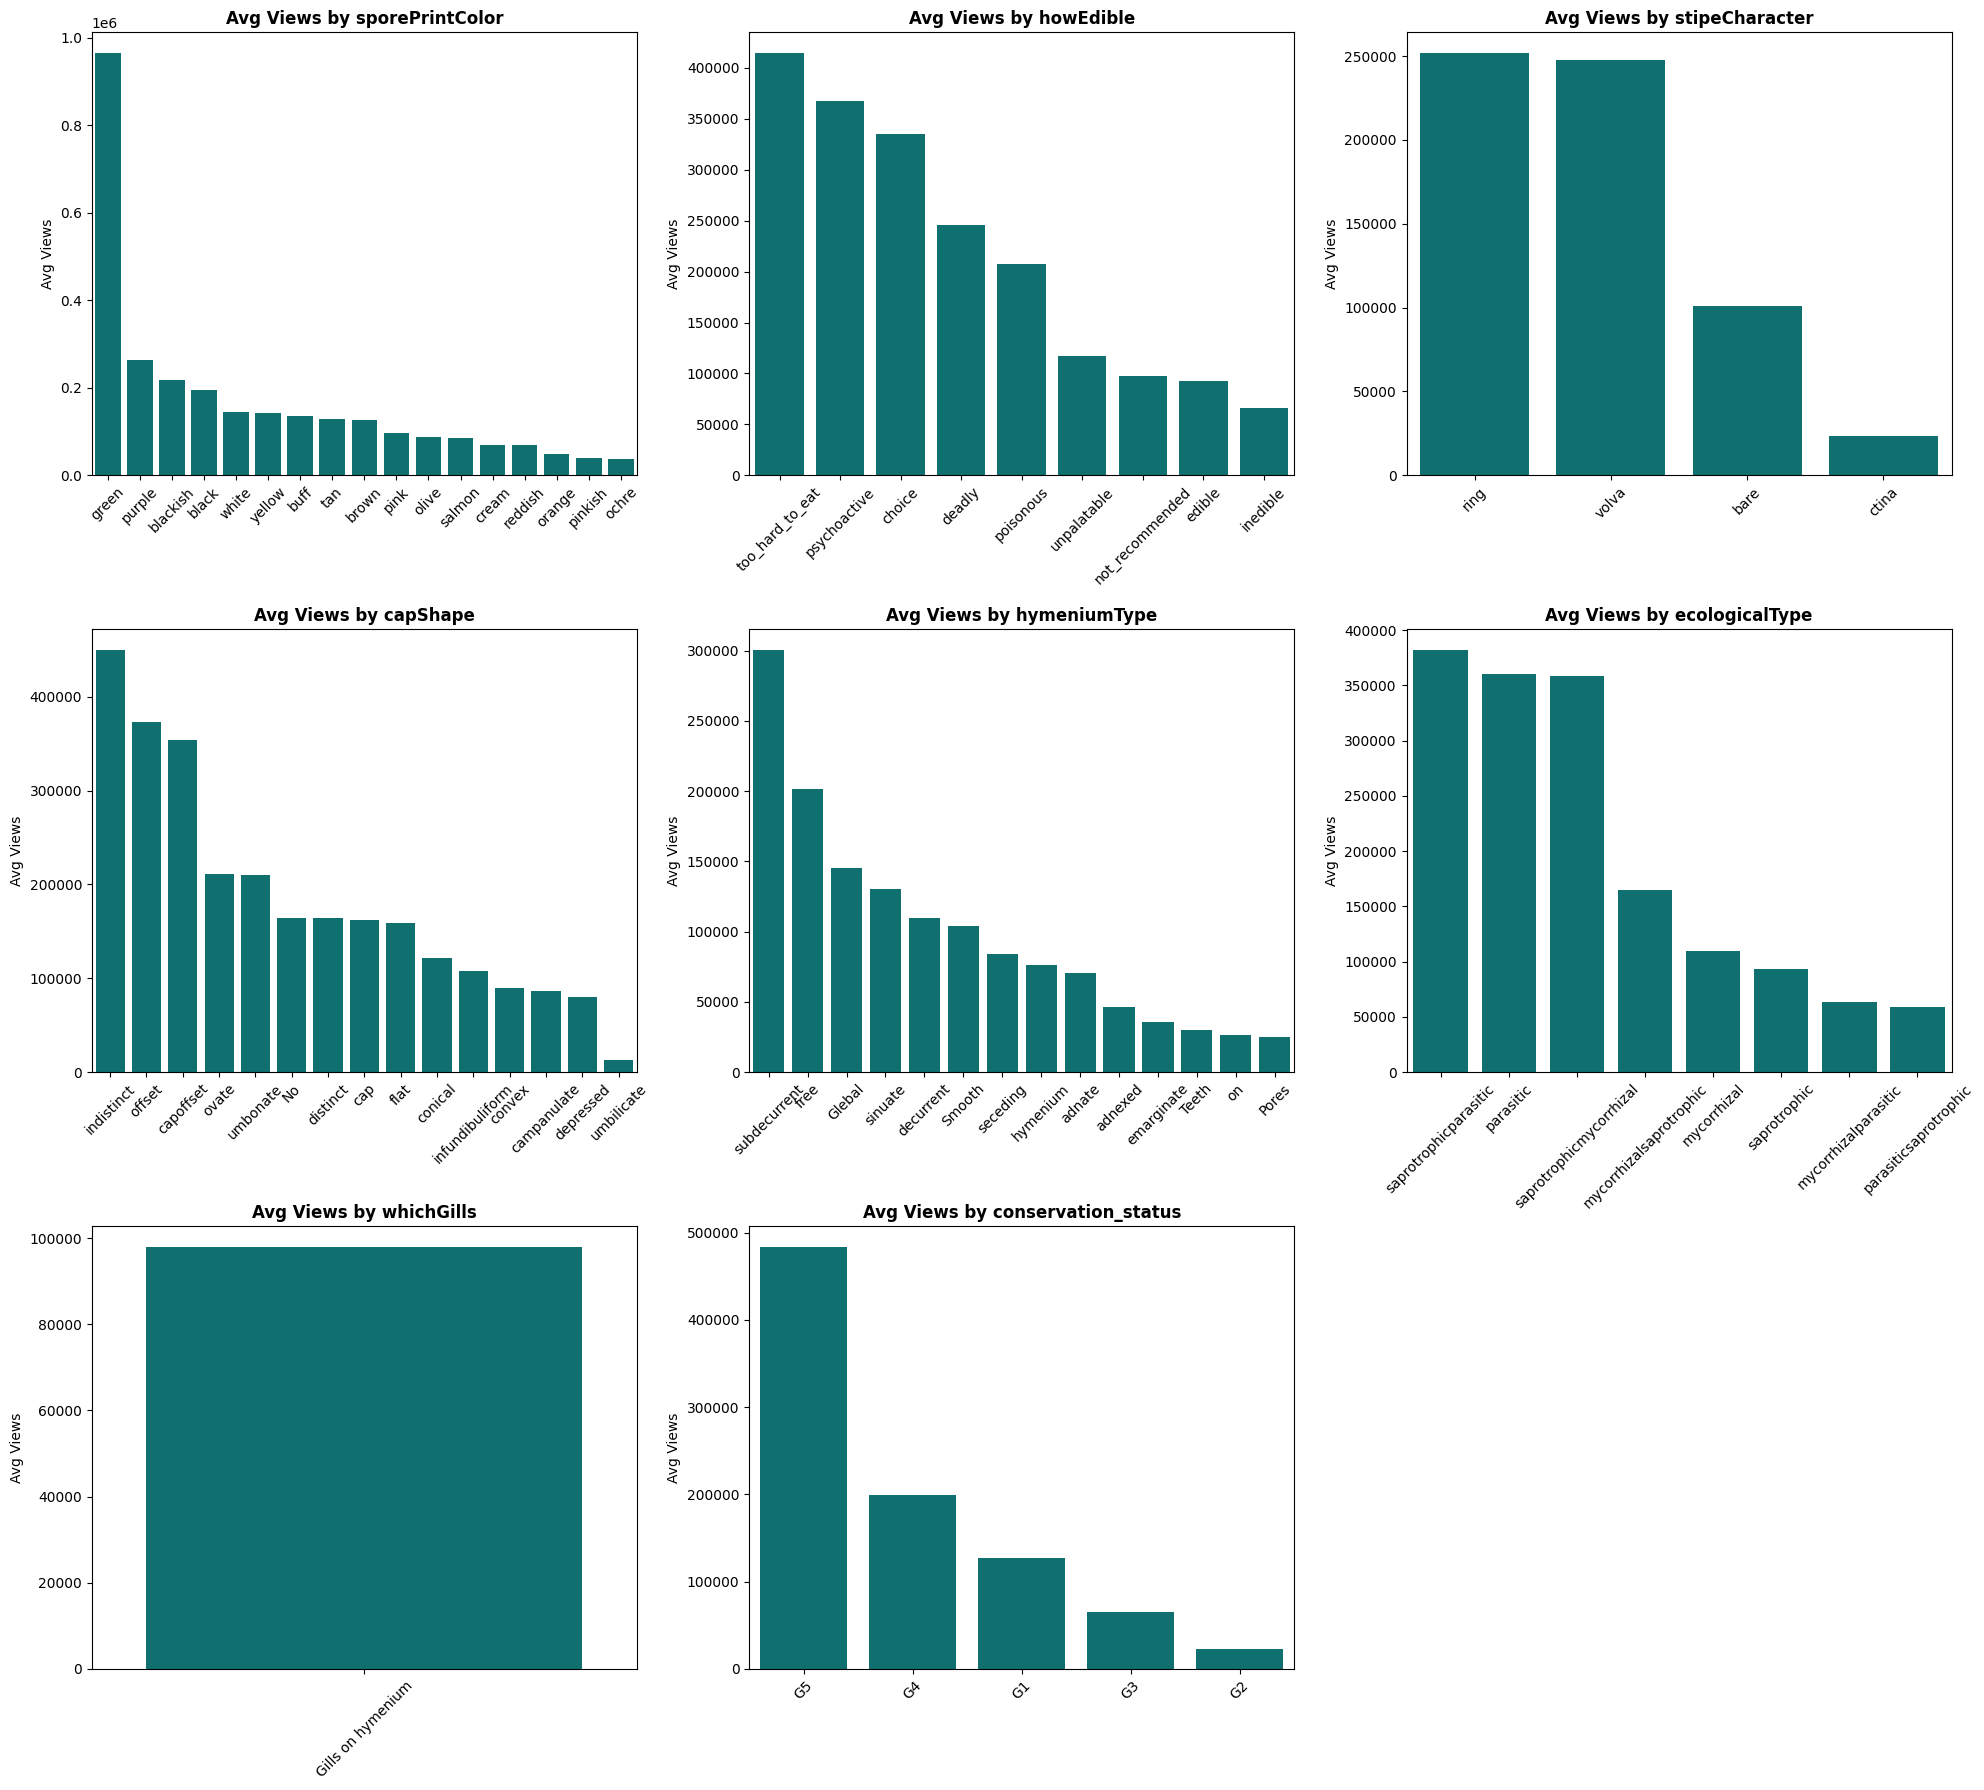

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

# Define your morphological attributes
morph_cols = ['sporePrintColor', 'howEdible', 'stipeCharacter', 'capShape', 
              'hymeniumType', 'ecologicalType', 'whichGills', 'conservation_status']

# Calculate grid size dynamically
n_cols = 3
n_rows = math.ceil(len(morph_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows))
axes = axes.flatten()

for i, col in enumerate(morph_cols):
    if i < len(axes): # check
        # explode + clean
        # select only the specific column and the views
        temp_df = df[[col, 'views_all_time']].copy()
        
        # explode the list column so each attribute gets its own row
        temp_df = temp_df.explode(col)
        
        # clean: remove NaNs and empty strings
        temp_df = temp_df.dropna(subset=[col])
        temp_df = temp_df[temp_df[col] != ''] 
        
        # collect
        # get Mean and Count
        agg_data = temp_df.groupby(col)['views_all_time'].agg(['mean', 'count'])
        
        # filter: Only show attributes that appear in at least 5 mushrooms 
        # (to avoid outliers where 1 mushroom has 100% of the views for a unique trait)
        agg_data = agg_data[agg_data['count'] >= 1]
        
        # sort by popularity
        top_attributes = agg_data.sort_values('mean', ascending=False)
        
        # plot
        if not top_attributes.empty:
            sns.barplot(x=top_attributes.index, y=top_attributes['mean'], ax=axes[i], color='teal')
            
            axes[i].set_title(f'Avg Views by {col}', fontsize=12, fontweight='bold')
            axes[i].set_xlabel('')
            axes[i].set_ylabel('Avg Views')
            axes[i].tick_params(axis='x', rotation=45, labelsize=10)
        else:
            axes[i].text(0.5, 0.5, 'Not enough data', ha='center')

# hide any empty subplots if the grid is larger than the number of attributes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Calculating Inequality (Gini) per attribute...
sporePrintColor: 0.6831
howEdible: 0.4118
stipeCharacter: 0.3991
capShape: 0.5414
hymeniumType: 0.6856
ecologicalType: 0.6876
conservation_status: 0.6627


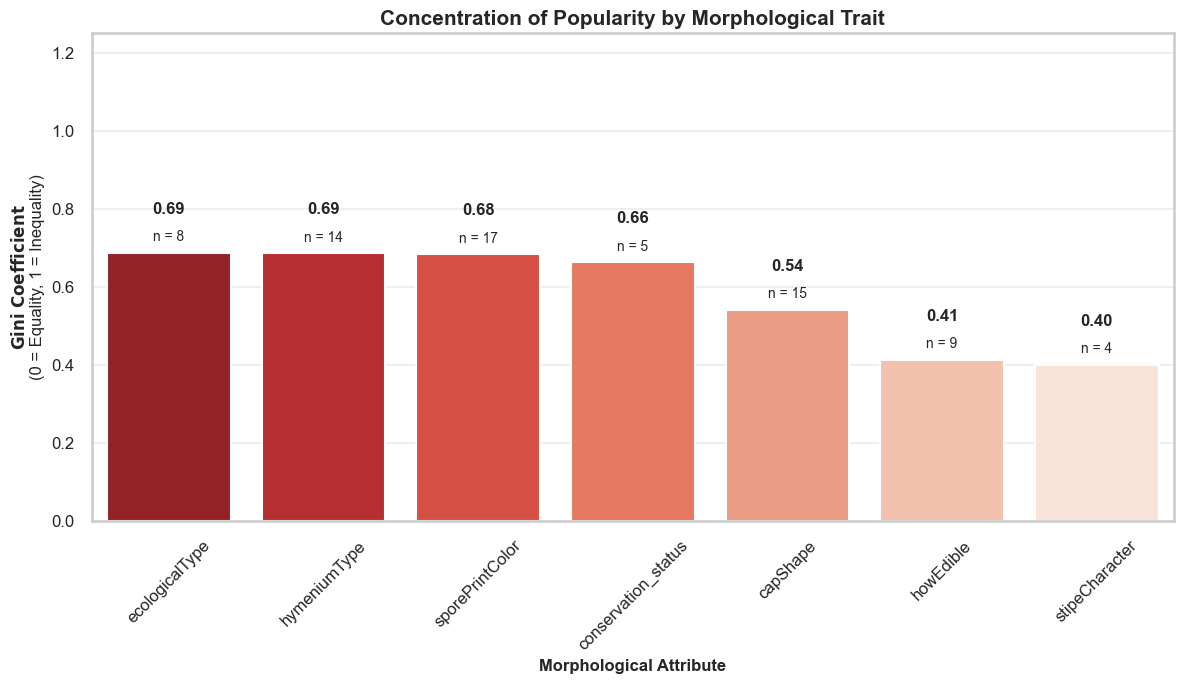

Saved figure to ../../plots/concentration_of_popularity_by_morphological_trait.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from datetime import datetime

# Reuse Gini Function
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    array = np.asarray(array, dtype=float) 
    array = array.flatten()
    if np.amin(array) < 0:
        array -= np.amin(array)
    array += 0.0000001 
    array = np.sort(array)
    index = np.arange(1, array.shape[0] + 1)
    n = array.shape[0]
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

# define columns
morph_cols = ['sporePrintColor', 'howEdible', 'stipeCharacter', 'capShape', 
              'hymeniumType', 'ecologicalType', 'whichGills', 'conservation_status']

morph_gini_scores = []

print("Calculating Inequality (Gini) per attribute...")

# set a single font size to be used everywhere in the plot
font_size = 12
plt.rcParams.update({
    'font.size': font_size,
    'axes.titlesize': font_size,
    'axes.labelsize': font_size,
    'xtick.labelsize': font_size,
    'ytick.labelsize': font_size,
    'legend.fontsize': font_size,
    'figure.titlesize': font_size
})

for col in morph_cols:
    # A. Explode the list column (Critical Step)
    # If a mushroom has ['yellow', 'ochre'], it creates 2 rows, duplicating the view count for each trait
    exploded_df = df[['views_all_time', col]].explode(col)
    
    # B. Clean Empty Data
    # remove NaNs and empty strings that come from empty lists []
    exploded_df = exploded_df.dropna(subset=[col])
    exploded_df = exploded_df[exploded_df[col] != '']
    
    # C. Group and Sum Views
    # We want to see if specific values (e.g., "Psychoactive") hog all the traffic
    group_views = exploded_df.groupby(col)['views_all_time'].sum()
    
    # D. Calculate Gini (only if we have more than 1 category)
    if len(group_views) > 1:
        score = gini(group_views.values)
        unique_count = group_views.shape[0]
        morph_gini_scores.append({'Attribute': col, 'Gini': score, 'Unique_Count': unique_count})
        print(f"{col}: {score:.4f}")

# 3. Create df and sort
gini_df = pd.DataFrame(morph_gini_scores)

# sort by Gini descending so the most unequal attributes are on the left
gini_df = gini_df.sort_values('Gini', ascending=False)

# 4. Visualization
plt.figure(figsize=(12, 7))

sns.barplot(
    data=gini_df,
    x='Attribute',
    y='Gini',
    hue='Attribute',
    palette='Reds_r', # Reversed Reds so darkest is highest Gini
    legend=False
)

plt.ylim(0, 1.25)
plt.title('Concentration of Popularity by Morphological Trait', fontsize=15, fontweight='bold')
plt.ylabel('$\\mathbf{Gini\\ Coefficient}$\n(0 = Equality, 1 = Inequality)', fontsize=font_size)
plt.xlabel('Morphological Attribute', fontsize=font_size, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

for i, row in enumerate(gini_df.itertuples()):
    xloc = i
    gini_label = f"{row.Gini:.2f}"
    count_label = f"n = {row.Unique_Count}"
    
    plt.text(xloc, row.Gini + 0.03, count_label, ha='center', fontsize=10)
    plt.text(xloc, row.Gini + 0.10, gini_label, ha='center', fontweight='bold', fontsize=font_size)

plt.tight_layout()

save_path = os.path.join("../../plots",
                         "concentration_of_popularity_by_morphological_trait.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight') 

plt.show()
print(f"Saved figure to {save_path}")


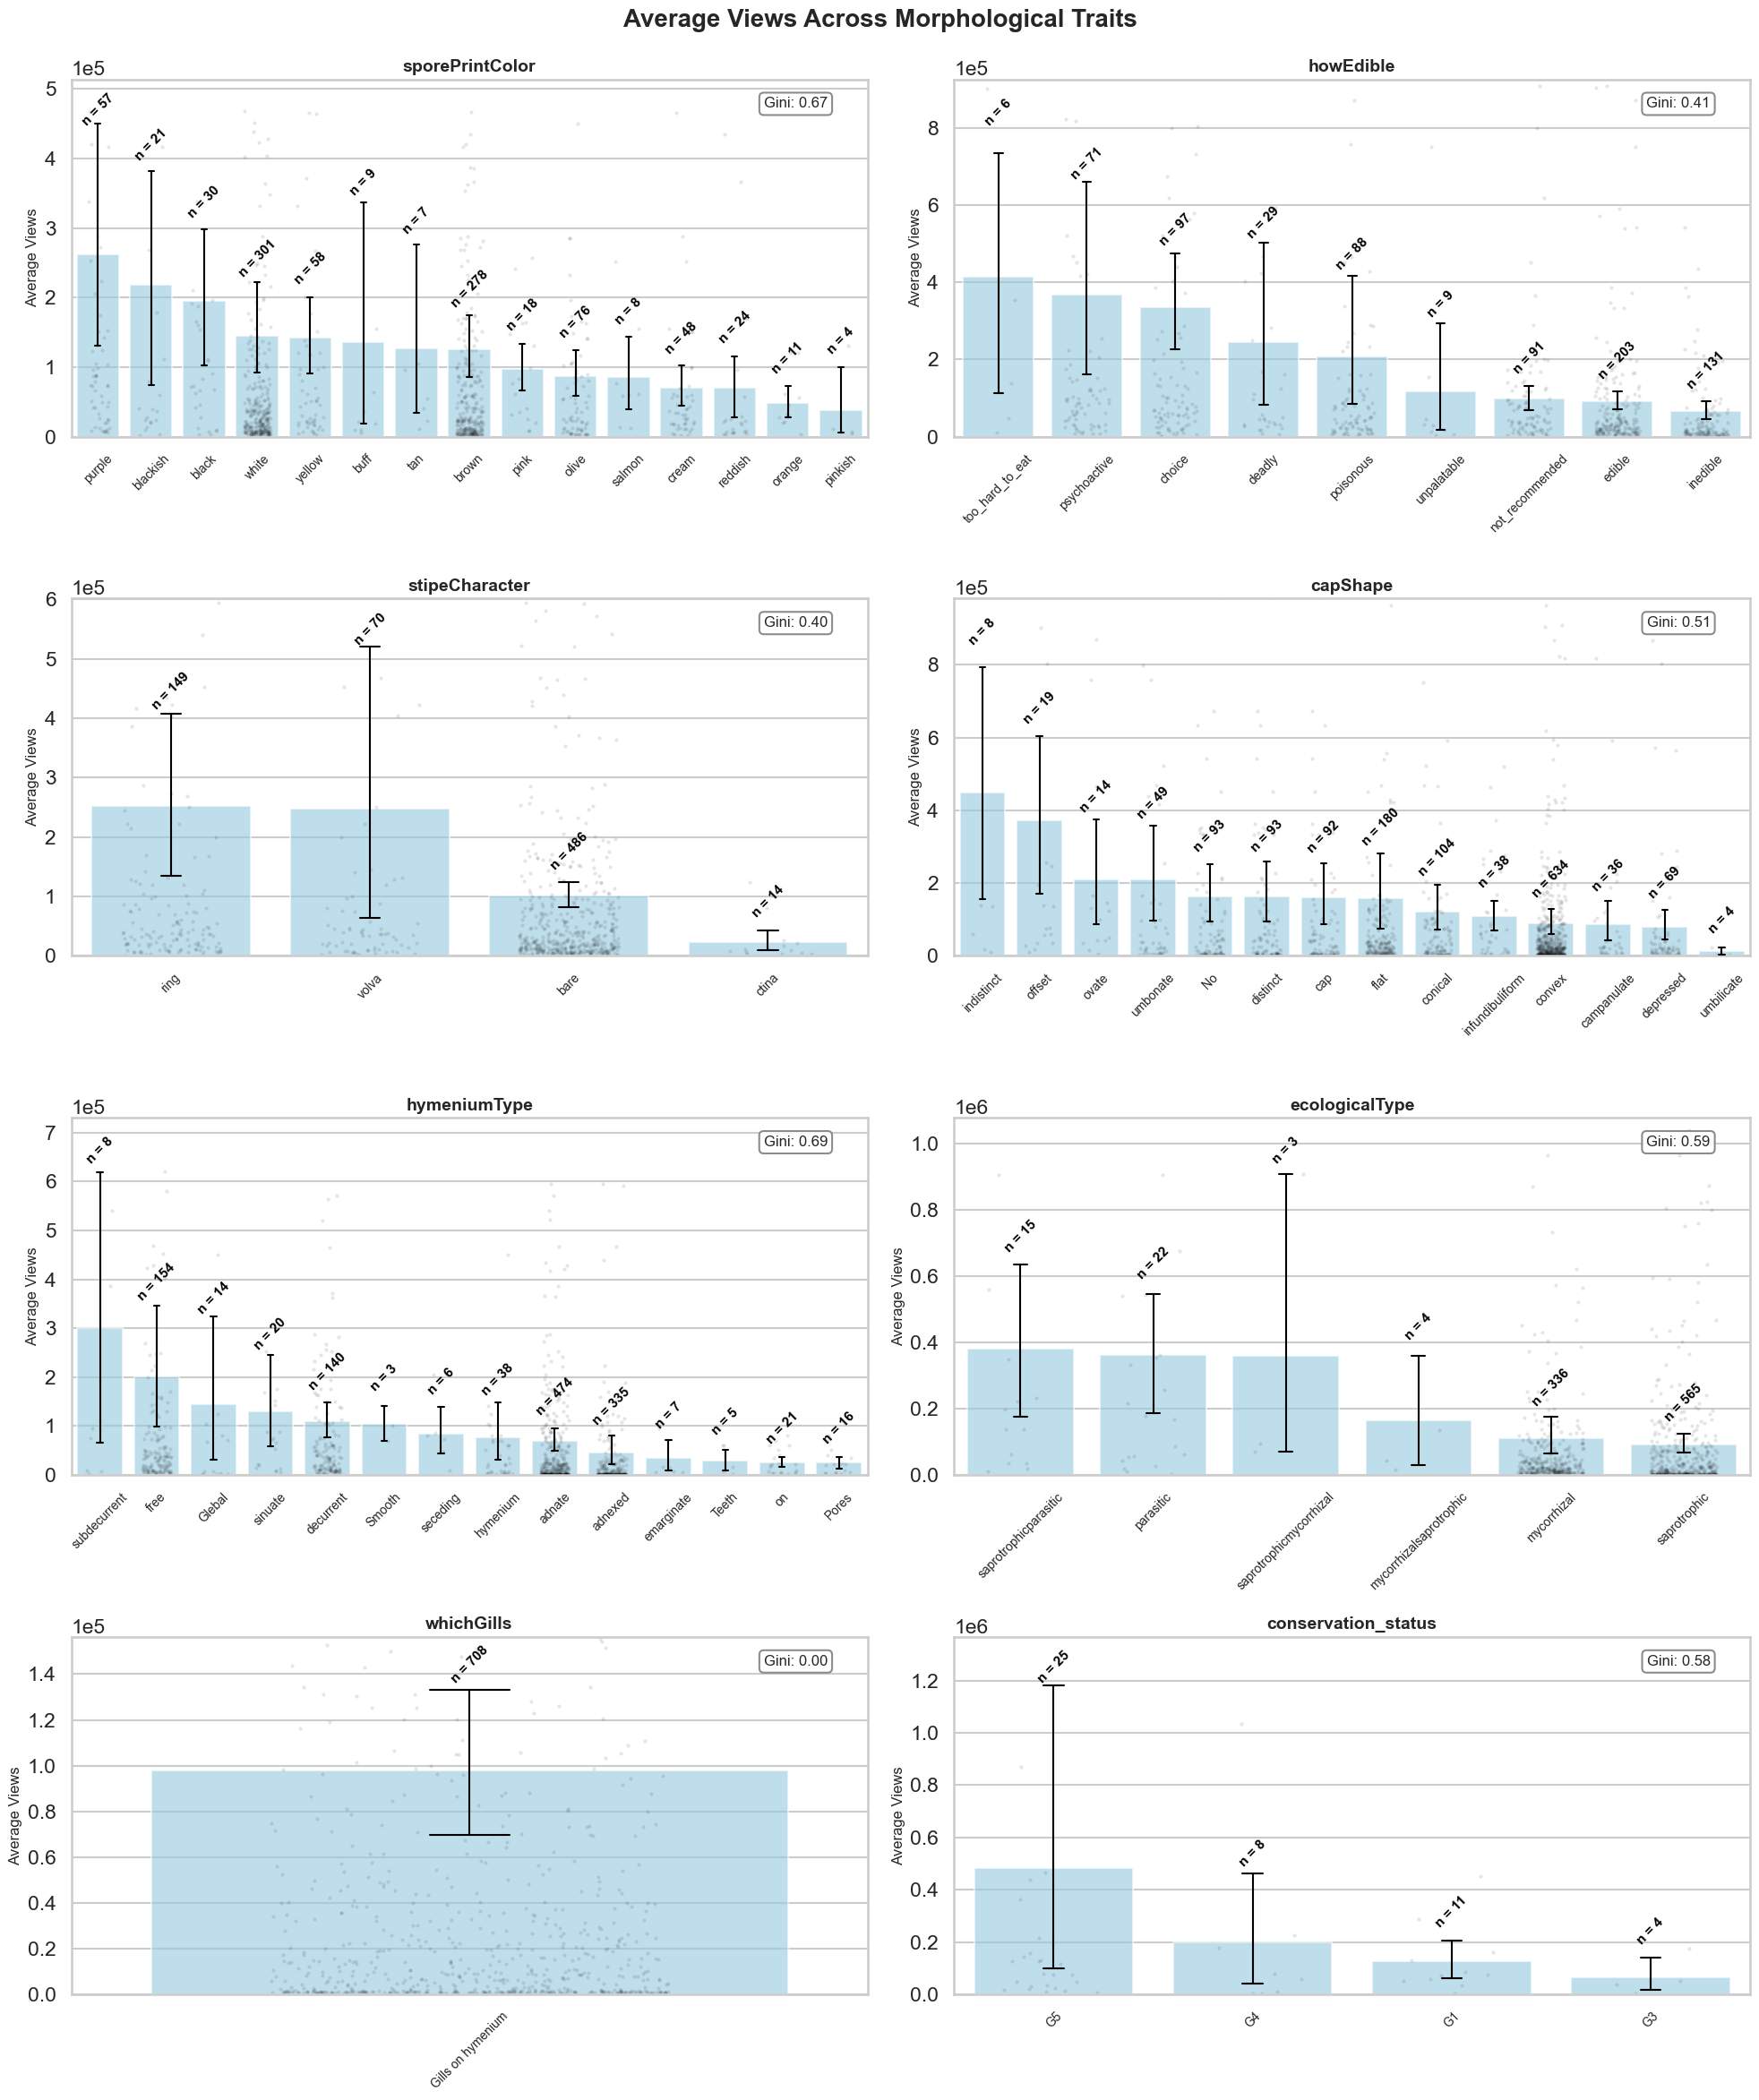

Saved figure to ../../plots/popularity_by_trait.png


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

# gini function
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    array = np.asarray(array, dtype=float)
    array = array.flatten()
    if np.amin(array) < 0:
        array -= np.amin(array)
    array += 1e-7
    array = np.sort(array)
    index = np.arange(1, array.shape[0] + 1)
    n = array.shape[0]
    return (np.sum((2 * index - n - 1) * array)) / (n * np.sum(array))


# set up
morph_cols = [
    'sporePrintColor', 'howEdible', 'stipeCharacter', 'capShape',
    'hymeniumType', 'ecologicalType', 'whichGills', 'conservation_status'
]

sns.set_theme(style="whitegrid", context="talk")

n_cols = 2
n_rows = math.ceil(len(morph_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows))
axes = axes.flatten()

# plot
for i, col in enumerate(morph_cols):
    if i < len(axes):
        ax = axes[i]

        # explode + clean
        temp_df = df[[col, 'views_all_time']].copy()
        temp_df = temp_df.explode(col)
        temp_df = temp_df.dropna(subset=[col])
        temp_df = temp_df[temp_df[col] != '']

        # collect stats (include std so we can compute CI)
        agg_data = temp_df.groupby(col)['views_all_time'].agg(
            ['mean', 'count', 'sum', 'std']
        )

        # filter: at least 3 mushrooms in a category
        agg_data = agg_data[agg_data['count'] >= 3]

        # sort by mean views (descending) and take top 15
        top_attributes = agg_data.sort_values('mean', ascending=False).head(15).copy()
        order_list = top_attributes.index.tolist()

        # get 95% CI for each category (mean ± 1.96 * SE)
        top_attributes['ci95'] = 1.96 * (
            top_attributes['std'] / np.sqrt(top_attributes['count'])
        )

        # raw subset restricted to top categories
        subset_raw = temp_df[temp_df[col].isin(order_list)]

        # Gini
        if len(agg_data) > 1:
            gini_score = gini(agg_data['sum'].values)
        else:
            gini_score = 0.0

        if not top_attributes.empty:
            # A. Bar plot with error bars (seaborn will compute its own CI,
            # but scale will be based on our manual CI above)
            sns.barplot(
                data=subset_raw,
                x=col,
                y='views_all_time',
                order=order_list,
                ax=ax,
                color='skyblue',
                alpha=0.6,
                errorbar=('ci', 95),
                capsize=0.1,
                err_kws={'color': 'black', 'linewidth': 1.5, 'zorder': 3},
                zorder=1
            )

            # B. Strip / jittered points
            sns.stripplot(
                data=subset_raw,
                x=col,
                y='views_all_time',
                order=order_list,
                ax=ax,
                color='black',
                alpha=0.1,
                size=3,
                jitter=0.25,
                zorder=2
            )

            # C. Y-limit based on (mean + CI)
            upper_ci = (top_attributes['mean'] + top_attributes['ci95']).max()
            ax.set_ylim(0, upper_ci * 1.2)   # a bit of headroom

            # Scientific notation for y-axis
            ax.yaxis.set_major_formatter(ScalarFormatter())
            ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

            # get updated limits and define a small vertical offset
            ymin, ymax = ax.get_ylim()
            offset = (ymax - ymin) * 0.03    # 3% of axis height

            # D. n-labels: above each bar, but clamped below top
            for idx, name in enumerate(order_list):
                row = top_attributes.loc[name]
                bar_top = row['mean'] + row['ci95']  # top of CI

                # put label above bar_top, but not higher than ymax
                y = min(bar_top + offset, ymax + 50)

                ax.text(
                    idx,
                    y,
                    f"n = {int(row['count'])}",
                    color='black',
                    ha='center',
                    va='bottom',
                    fontsize=11,
                    fontweight='bold',
                    rotation=45   # or try 0 or 30 if you want less tilt
                )

            # E. Gini annotation
            ax.text(
                0.95, 0.95,
                f'Gini: {gini_score:.2f}',
                transform=ax.transAxes,
                ha='right',
                va='top',
                fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3",
                          fc="white", ec="gray", alpha=0.9)
            )

            # Formatting
            ax.set_title(col, fontsize=14, fontweight='bold')
            ax.set_xlabel('')
            ax.set_ylabel('Average Views', fontsize=12)
            ax.tick_params(axis='x', rotation=45, labelsize=10)
        else:
            ax.text(0.5, 0.5, 'Not enough data', ha='center', va='center')
            ax.set_axis_off()

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Average Views Across Morphological Traits", fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

save_path = os.path.join("../../plots", f"popularity_by_trait.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Saved figure to {save_path}")


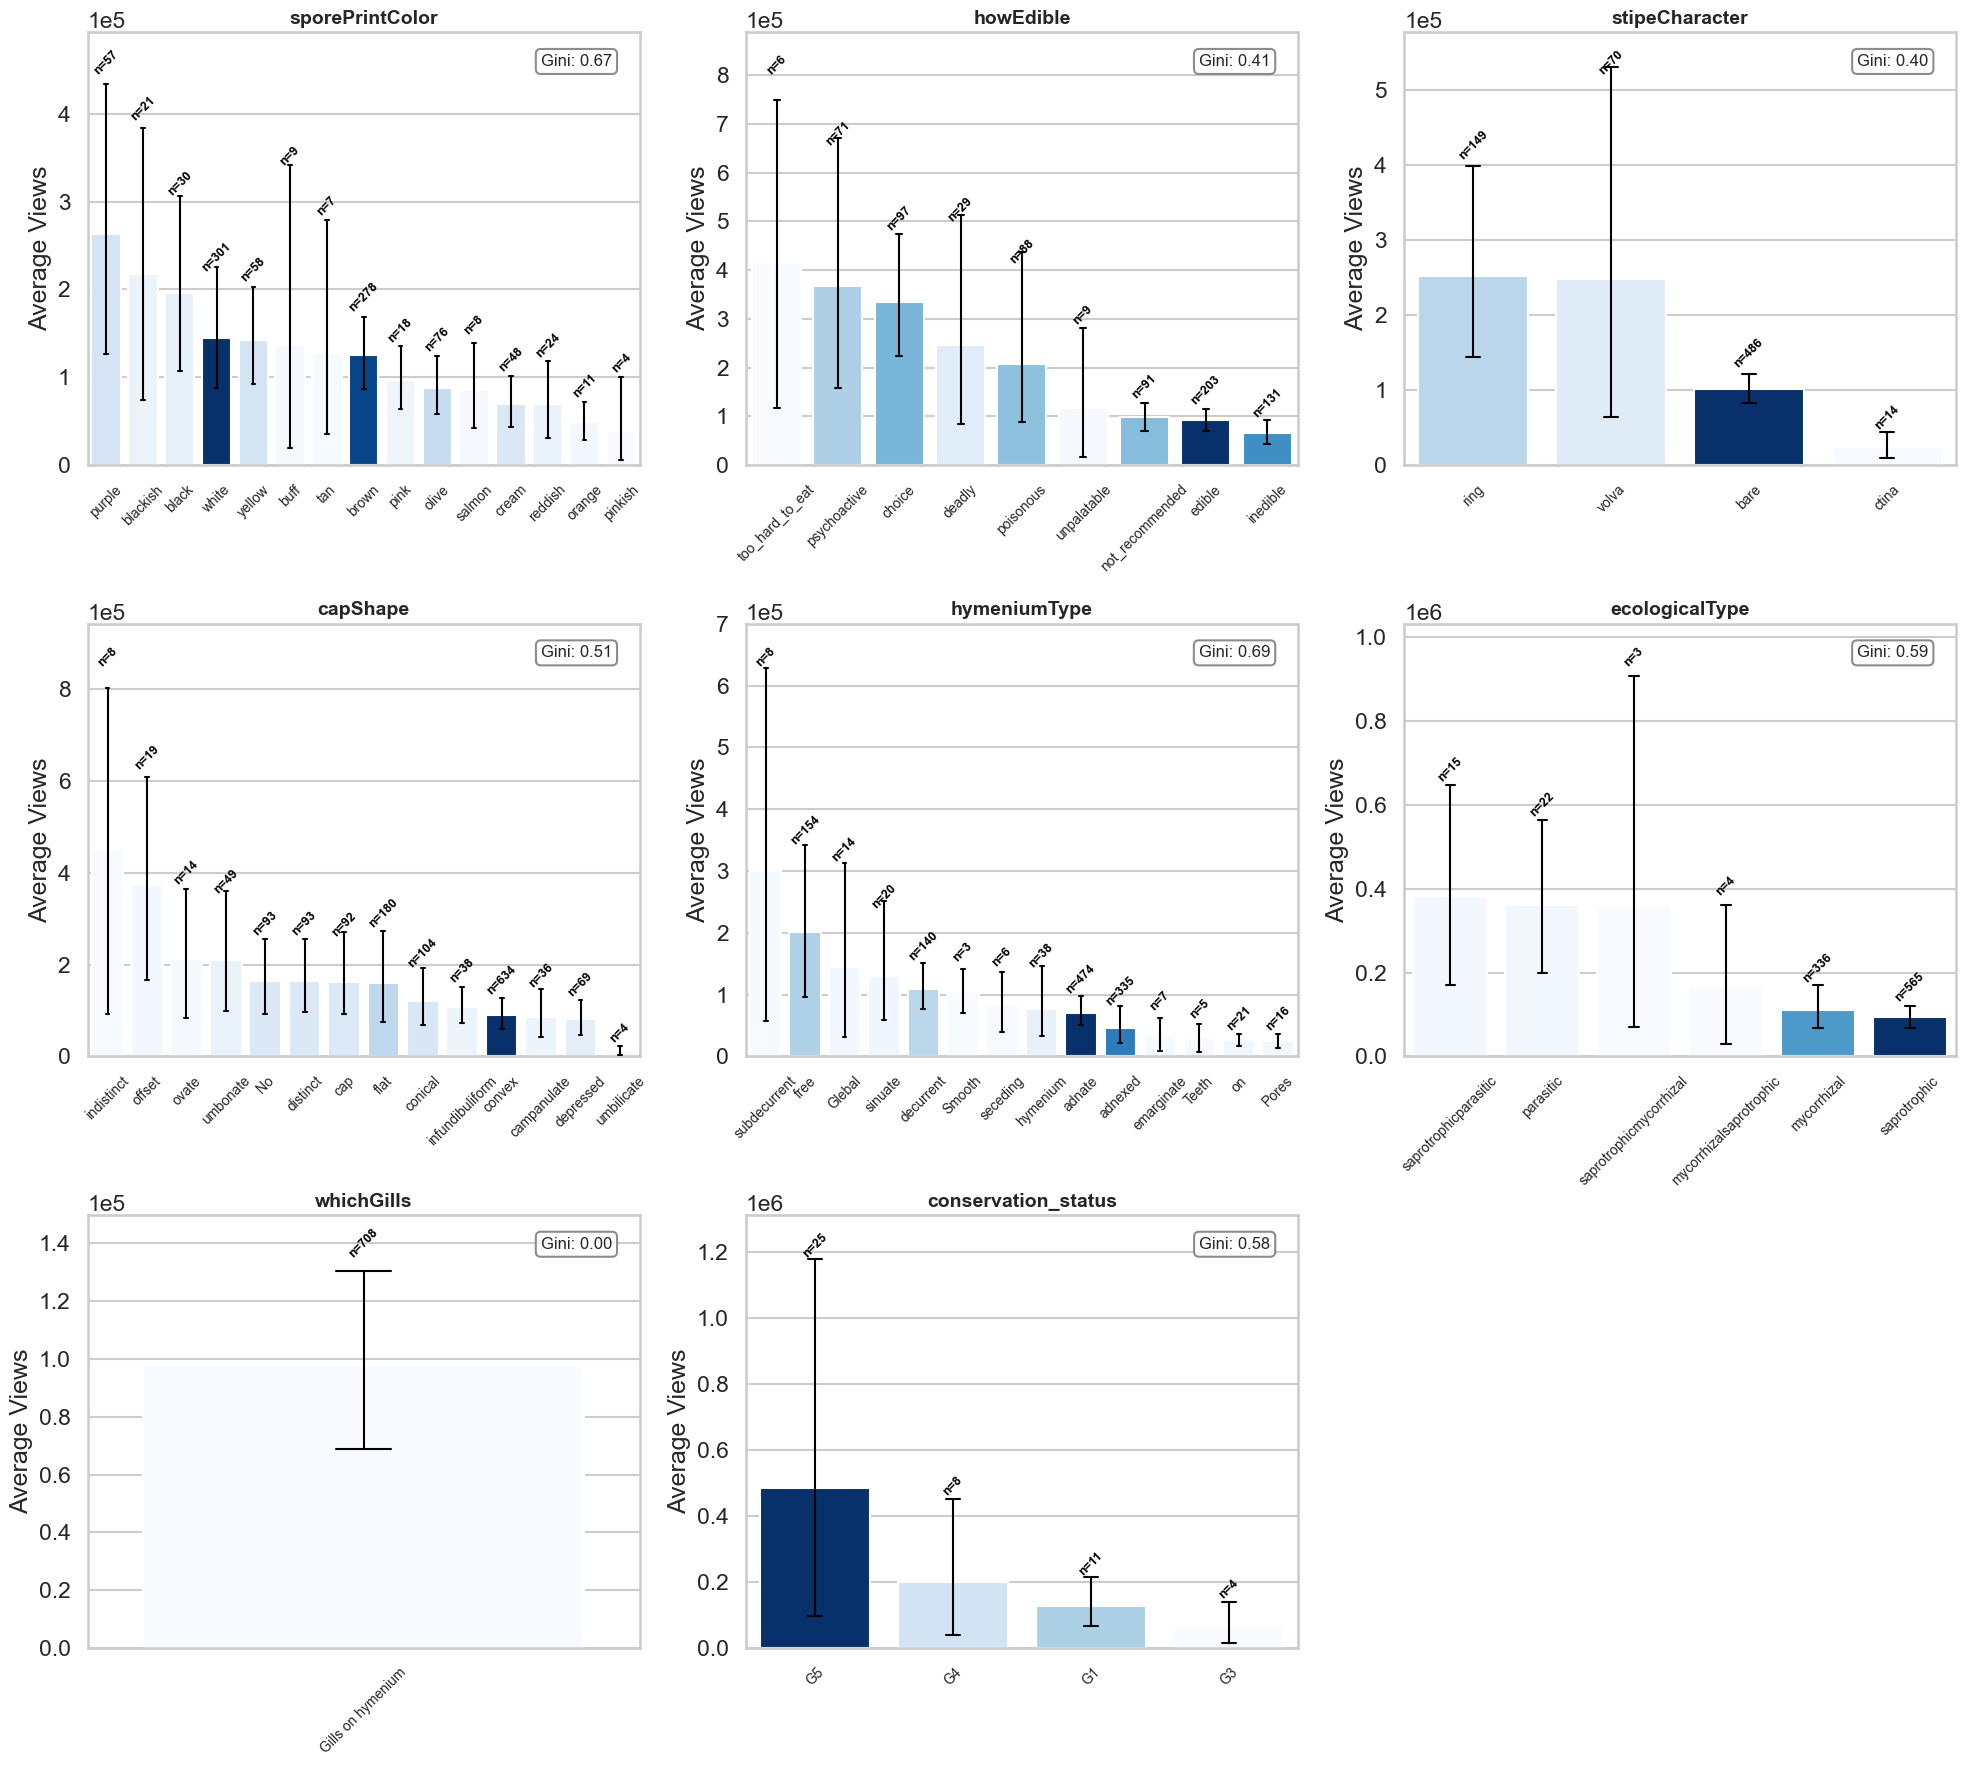

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter
import matplotlib.colors as mcolors

# gini
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    array = np.asarray(array, dtype=float)
    array = array.flatten()
    if np.amin(array) < 0:
        array -= np.amin(array)
    array += 1e-7
    array = np.sort(array)
    index = np.arange(1, array.shape[0] + 1)
    n = array.shape[0]
    return (np.sum((2 * index - n - 1) * array)) / (n * np.sum(array))


# setting
morph_cols = [
    'sporePrintColor', 'howEdible', 'stipeCharacter', 'capShape',
    'hymeniumType', 'ecologicalType', 'whichGills', 'conservation_status'
]

sns.set_theme(style="whitegrid", context="talk")

n_cols = 3
n_rows = math.ceil(len(morph_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows))
axes = axes.flatten()

# plot
for i, col in enumerate(morph_cols):
    if i < len(axes):
        ax = axes[i]

        # 1. Explode and clean
        temp_df = df[[col, 'views_all_time']].copy()
        temp_df = temp_df.explode(col)
        temp_df = temp_df.dropna(subset=[col])
        temp_df = temp_df[temp_df[col] != '']

        # 2. Aggregate stats (include std so we can compute CI)
        agg_data = temp_df.groupby(col)['views_all_time'].agg(
            ['mean', 'count', 'sum', 'std']
        )

        # Filter: at least 3 mushrooms in a category
        agg_data = agg_data[agg_data['count'] >= 3]

        # Sort by mean views (descending) and take top 15
        top_attributes = agg_data.sort_values('mean', ascending=False).head(15).copy()
        order_list = top_attributes.index.tolist()

        # Compute 95% CI (mean ± 1.96 * SE)
        top_attributes['ci95'] = 1.96 * (
            top_attributes['std'] / np.sqrt(top_attributes['count'])
        )
        top_attributes['ci95'] = top_attributes['ci95'].fillna(0)

        # Raw subset restricted to top categories
        subset_raw = temp_df[temp_df[col].isin(order_list)]

        # 3. Gini
        if len(agg_data) > 1:
            gini_score = gini(agg_data['sum'].values)
        else:
            gini_score = 0.0

        if not top_attributes.empty:
            # color bars based on count
            # Counts in the same order as the bars
            counts = top_attributes.loc[order_list, 'count'].to_numpy(float)

            # Normalise counts for colormap (0 → min, 1 → max)
            norm = mcolors.Normalize(vmin=counts.min(), vmax=counts.max())
            cmap = mpl.colormaps['Blues']  # new, non-deprecated API

            # A. Bar plot (initially all one color)
            sns.barplot(
                data=subset_raw,
                x=col,
                y='views_all_time',
                order=order_list,
                ax=ax,
                color='lightgrey',   # temporary color, will be overwritten
                errorbar=('ci', 95),
                capsize=0.1,
                err_kws={'color': 'black', 'linewidth': 1.5, 'zorder': 3},
                zorder=1
            )

            # Recolor each bar by its count
            for patch, c in zip(ax.patches, counts):
                patch.set_facecolor(cmap(norm(c)))

            # B. (No stripplot – we removed the dots)

            # C. Y-limit based on (mean + CI)
            upper_ci = (top_attributes['mean'] + top_attributes['ci95']).max()
            ax.set_ylim(0, upper_ci * 1.15)

            # Scientific notation for y-axis
            ax.yaxis.set_major_formatter(ScalarFormatter())
            ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

            # D. n-labels just above each error bar, rotated
            for idx, name in enumerate(order_list):
                row = top_attributes.loc[name]
                bar_top = row['mean'] + row['ci95']
                ax.text(
                    idx,
                    bar_top * 1.03,          # slightly above CI
                    f"n={int(row['count'])}",
                    color='black',
                    ha='center',
                    va='bottom',
                    fontsize=9,
                    fontweight='bold',
                    rotation=45             # rotate the n-labels
                )

            # E. Gini annotation
            ax.text(
                0.95, 0.95,
                f'Gini: {gini_score:.2f}',
                transform=ax.transAxes,
                ha='right',
                va='top',
                fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3",
                          fc="white", ec="gray", alpha=0.9)
            )

            # Formatting
            ax.set_title(col, fontsize=14, fontweight='bold')
            ax.set_xlabel('')
            ax.set_ylabel('Average Views')
            ax.tick_params(axis='x', rotation=45, labelsize=10)
        else:
            ax.text(0.5, 0.5, 'Not enough data', ha='center', va='center')
            ax.set_axis_off()

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
